# SCRIPT OUTLINE - part 1

## -----------------------------------------------------------------------------------------------------------
## Import Dataset

## 1 Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Importing analysis libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining a short project folder

path = r'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.9/2021-10 - 4.9 Instacart Grocery Basket'

In [3]:
# Importing the most up-to-date project data

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged_4.9_P2.pkl'))


In [4]:
df_ords_prods_cust.shape

(30356128, 32)

In [17]:
# Checking the columns and records

pd.options.display.max_columns = None

df_ords_prods_cust.head()


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust


In [6]:
# Checking the data types

df_ords_prods_cust.dtypes


product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spenders                   float64
spenders_flag               object
customer_frequency         float64
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state                       object
age                          int64
date_joined         

## -----------------------------------------------------------------------------------------------------------
## Address PII data

### 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [19]:
# Addressing the PII data creating a new dataframe without the "first_name" and "surname"

df_ords_prods_cust_PII = df_ords_prods_cust.drop(columns = ['first_name', 'surname'])


In [20]:
df_ords_prods_cust_PII.shape

(30356128, 31)

In [250]:
df_ords_prods_cust_PII.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest


## -----------------------------------------------------------------------------------------------------------
## Segment the dataset

### 3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

#### * Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### * Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [82]:
# Cleaning and importing the data from the Wikipedia into a Google spredsheet
# Importing and checking region data into a Pandas

df_region = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'US regional segmentation.csv'))


In [83]:
df_region

,State,Region
0,Maine,Northeast
1,New Hampshire,Northeast
2,Vermont,Northeast
3,Massachusetts,Northeast
4,Rhode Island,Northeast
5,Connecticut,Northeast
6,New York,Northeast
7,Pennsylvania,Northeast
8,New Jersey,Northeast
9,Wisconsin,Midwest


In [84]:
# Grouping the states into regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']



In [85]:
# Assigning states to regions 

result = []

for value in df_ords_prods_cust_PII['state']:
    if value in Northeast:
        result.append('Northeast')
    elif value in Midwest:
        result.append('Midwest')
    elif value in South:
        result.append('South')
    elif value in West:
        result.append('West')
    else:
        result.append('non_region')

In [255]:
# Creating the "Region" new column into the dataset 

df_ords_prods_cust_PII['Region'] = result


In [256]:
# Counting dataset records per "Region"

df_ords_prods_cust_PII['Region'].value_counts()


South        10108875
West          7772130
Midwest       7113622
Northeast     5361501
Name: Region, dtype: int64

In [257]:
10108875+7772130+7113622+5361501

30356128

In [262]:
df_ords_prods_cust_PII.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest


In [90]:
crosstab = pd.crosstab(df_ords_prods_cust_PII['Region'], df_ords_prods_cust_PII['exclusion_flag'], dropna = False)

In [91]:
crosstab

exclusion_flag,low_activ_cust,non_low_activ_cust
Region,,
Midwest,239372,6874250
Northeast,183572,5177929
South,343223,9765652
West,260183,7511947


In [ ]:
# The data shows that there is a relevant spending habits difference among the regions. 
# South (33%) is the higher spending region and the Northeast (18%) is the lower.
# Midwest and West represents 23% and 25% respectevely. 
# The size of the population of each region has not been considered to the analysis. 

# 'exclusion_flag' column included below represents customers who do not generate much revenue (less than 5 orders).
# So, the data shows that customers with more than 5 orders ('non_low_activ_cust' column) represents the majority of the observations (97%).
# and only 3% of the customers have placed less than 5 orders ('low_activ_cust' column).


In [40]:
low_activ_cust = 239372 + 183572 + 343223 + 260183

In [41]:
low_activ_cust

1026350

In [42]:
non_low_activ_cust = 6874250 + 5177929 + 9765652 + 7511947

In [43]:
non_low_activ_cust

29329778

In [48]:
low_activ_cust / (low_activ_cust + non_low_activ_cust) * 100

3.381030676903194

In [49]:
non_low_activ_cust / (low_activ_cust + non_low_activ_cust) * 100

96.6189693230968

## -----------------------------------------------------------------------------------------------------------
## Exclude customers who don't generate much revenue

### 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [55]:
# Creating an exclusion flag for low-activity customers with less 5 orders or gretaer than 5.

df_ords_prods_cust_PII.loc[df_ords_prods_cust_PII['max_order'] < 5, 'exclusion_flag'] = 'low_activ_cust'
df_ords_prods_cust_PII.loc[df_ords_prods_cust_PII['max_order'] >= 5, 'exclusion_flag'] = 'non_low_activ_cust'
                        

In [56]:
df_ords_prods_cust_PII['exclusion_flag'].value_counts(dropna = False)

non_low_activ_cust    29329778
low_activ_cust         1026350
Name: exclusion_flag, dtype: int64

In [58]:
df_ords_prods_cust_PII.shape

(30356128, 32)

In [59]:
df_ords_prods_cust_PII.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest


In [60]:
# Create a subset for 'Low-activity_cust' to exclude them from the sample

df_low_activ_cust = df_ords_prods_cust_PII[df_ords_prods_cust_PII['exclusion_flag'] == 'low_activ_cust']

In [61]:
# Check whether all values in max_order column are < 5 in this subset 

df_low_activ_cust['max_order'].value_counts()

4    566728
3    459622
Name: max_order, dtype: int64

In [268]:
# Confirming the number of records for the value "low_activ_cust" in the "exclusion_flag" column.
# These number represents customers who don't generate much revenue which are those who placed less than 5 orders.

566728 + 459622

1026350

In [63]:
# Change the path to export the dataframe "df_low_activ_cust"

path = r'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.10/2021-10 - 4.10 Instacart Grocery Basket'

In [64]:
path

'/Users/cleberjulianoferrareze/Documents/CareerFoundry/Achievement 4/Task 4.10/2021-10 - 4.10 Instacart Grocery Basket'

In [65]:
# Export sample 

df_low_activ_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_activ_cust.pkl'))

In [66]:
# Create a new data frame with 97% of regular customers without low activity (< 5 orders). 
# These customers placed more than 5 orders ('max_order').

df_ords_prods_non_low_act_cust = df_ords_prods_cust_PII[df_ords_prods_cust_PII['exclusion_flag'] == 'non_low_activ_cust']


In [67]:
df_ords_prods_non_low_act_cust.shape

(29329778, 32)

In [69]:
df_ords_prods_non_low_act_cust.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31805,Gourmet Tomato Medley,32,4,5.2,2526903,138,14,0,15,8.0,6,0,both,Mid-range product,Busiest days,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
96,31860,Foil Sheets,85,17,11.7,1593782,138,15,6,11,6.0,4,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
97,32478,Reduced Fat 2% Milk,84,16,13.9,2206168,138,27,3,18,30.0,1,0,both,Mid-range product,Slowest busy days,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest
98,32689,Romaine Hearts,123,4,2.9,960220,138,17,5,14,19.0,3,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest


## -----------------------------------------------------------------------------------------------------------
## Profile customers for a marketing strategy

### 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


### Age

In [70]:
# Identifying the customer profilling based on "age"

df_ords_prods_non_low_act_cust['age'].value_counts().sort_index()


18    453366
19    470098
20    453899
21    463853
22    465575
       ...  
77    451800
78    445888
79    482114
80    467450
81    460034
Name: age, Length: 64, dtype: int64

In [135]:
# Defining a range of age groups (agen ranges is based on pewresearch.org)

# 18-29
# 30-49
# 50-64
# 65+

In [74]:
# Defining the customer profilling based on "age"

age_range = []

for value in df_ords_prods_non_low_act_cust['age']:
    if (value >= 18) and (value <= 29):
        age_range.append('18-29')
    elif (value >= 30) and (value <= 49):
        age_range.append('30-49')
    elif (value >= 50) and (value <= 64):
        age_range.append('50-64')
    elif (value > 64) and (value <= 95):
        age_range.append('65+')    
    else:
        result.append('out_of_age_range')
        

In [79]:
df_ords_prods_non_low_act_cust['age_range'] = age_range

<ipython-input-79-740d0d7942d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_non_low_act_cust['age_range'] = age_range


In [80]:
# Counting the age range

df_ords_prods_non_low_act_cust['age_range'].value_counts().sort_index()

18-29    5511070
30-49    9218978
50-64    6838383
65+      7761347
Name: age_range, dtype: int64

### Income

In [81]:
# Identifying the customer profilling based on "income"

df_ords_prods_non_low_act_cust['income'].value_counts().sort_index()


25903      18
25911      24
25937      34
25941      27
25955     389
         ... 
584097    815
590790     41
591089    170
592409    287
593901    622
Name: income, Length: 96070, dtype: int64

In [ ]:
Defining the income_range: 

range: 25.903 - 593.901

# 0.000-50.000
# 50.001-100.000
# 100.001-150.000
# 150.001-200.000
# 200.000+

In [121]:
income_range = []

for value in df_ords_prods_non_low_act_cust['income']:
    if value <= 50000: 
        income_range.append('025000-50000')
    elif (value > 50000) and (value <= 100000):
        income_range.append('050000-100000')
    elif (value > 100000) and (value <= 150000):
        income_range.append('100000-150000')
    elif (value > 150000) and (value <= 200000):
        income_range.append('150000-200000')
    elif (value > 200000):
        income_range.append('200000+')
    else: 
        income_range.append('out_of_income_range')
        

In [122]:
# Creating new column for the "income_range" 

df_ords_prods_non_low_act_cust['income_range'] = income_range

<ipython-input-122-ab3204aee013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_non_low_act_cust['income_range'] = income_range


In [124]:
# Counting the "income_range"

df_ords_prods_non_low_act_cust['income_range'].value_counts().sort_index()


025000-50000      3171268
050000-100000    12696339
100000-150000     9769025
150000-200000     3449799
200000+            243347
Name: income_range, dtype: int64

In [126]:
# Crossing and counting "income_range" with "age_range"

crosstab_income = pd.crosstab(df_ords_prods_non_low_act_cust['age_range'], df_ords_prods_non_low_act_cust['income_range'], dropna = False).sort_index()


In [127]:
crosstab_income

income_range,025000-50000,050000-100000,100000-150000,150000-200000,200000+
age_range,,,,,
18-29,847877,4487111,122489,33742,19851
30-49,1101987,5023457,2236560,779917,77057
50-64,584784,1500613,3433976,1250202,68808
65+,636620,1685158,3976000,1385938,77631


### Departments and Goods

In [128]:
# Identifying the customer profilling based on "certain goods" in the department_id
# Importing departments data to merge with "df_ords_prods_non_low_act_cust" dataset

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))


In [129]:
df_departments.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [131]:
df_departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [132]:
# Adding the name of the department based on the code 

df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 1, 'department'] = 'frozen'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 2, 'department'] = 'other'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 3, 'department'] = 'bakery'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 4, 'department'] = 'produce'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 5, 'department'] = 'alcohol'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 6, 'department'] = 'international'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 7, 'department'] = 'beverages'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 8, 'department'] = 'pets'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 9, 'department'] = 'dry goods pasta'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 10, 'department'] = 'bulk'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 11, 'department'] = 'personal care'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 12, 'department'] = 'meat seafood'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 13, 'department'] = 'pantry'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 14, 'department'] = 'breakfast'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 15, 'department'] = 'canned goods'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 16, 'department'] = 'dairy eggs'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 17, 'department'] = 'household'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 18, 'department'] = 'babies'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 19, 'department'] = 'snacks'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 20, 'department'] = 'deli'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['department_id'] == 21, 'department'] = 'missing'



/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [133]:
# Counting orders by departments

df_ords_prods_non_low_act_cust['department'].value_counts()


produce            8608702
dairy eggs         4923201
snacks             2620533
beverages          2437614
frozen             1997965
pantry             1681574
bakery             1064582
canned goods        954449
deli                947553
dry goods pasta     773993
household           658975
breakfast           640258
meat seafood        637280
personal care       399844
babies              391707
international       240869
alcohol             134910
pets                 87810
missing              63389
other                32572
bulk                 31998
Name: department, dtype: int64

In [192]:
df_ords_prods_non_low_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spenders,spenders_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,exclusion_flag,Region,age_range,income_range,department,day_of_week
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest,65+,025000-50000,snacks,Friday
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest,65+,025000-50000,snacks,Friday
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest,65+,025000-50000,meat seafood,Thursday
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest,65+,025000-50000,bulk,Friday
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range product,Regularly busy,Most Orders,32,Regular customer,6.769286,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,non_low_activ_cust,Midwest,65+,025000-50000,produce,Thursday


### Region

In [193]:
# Counting orders by region

df_ords_prods_non_low_act_cust['Region'].value_counts()


South        9765652
West         7511947
Midwest      6874250
Northeast    5177929
Name: Region, dtype: int64

### Number of Dependents

In [134]:
# Counting orders by number of dependents (0, 1, 2 or 3 dependents)

df_ords_prods_non_low_act_cust['n_dependants'].value_counts().sort_index()


0    7331833
1    7310123
2    7323872
3    7363950
Name: n_dependants, dtype: int64

### Days of the Week

In [150]:
# Describing the days of the week according to the corresponding codes 

df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 0, 'day_of_week'] = 'Saturday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 1, 'day_of_week'] = 'Sunday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 2, 'day_of_week'] = 'Monday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 3, 'day_of_week'] = 'Tuesday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 4, 'day_of_week'] = 'Wednesday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 5, 'day_of_week'] = 'Thursday'
df_ords_prods_non_low_act_cust.loc[df_ords_prods_non_low_act_cust['order_dow'] == 6, 'day_of_week'] = 'Friday'


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [151]:
# Counting orders by day of the week

df_ords_prods_non_low_act_cust['day_of_week'].value_counts()


Saturday     5573181
Sunday       5130679
Friday       4048301
Thursday     3833357
Monday       3817609
Tuesday      3481864
Wednesday    3444787
Name: day_of_week, dtype: int64

### Family Status | Departments | Regions

In [136]:
# Counting orders by the following family status below

df_ords_prods_non_low_act_cust['family_status'].value_counts()


married                             20593930
single                               4825365
divorced/widowed                     2506468
living with parents and siblings     1404015
Name: family_status, dtype: int64

In [145]:
# Crossing and counting orders by departments and family status

crosstab_family_status_dept = pd.crosstab(df_ords_prods_non_low_act_cust['department'], df_ords_prods_non_low_act_cust['family_status'], dropna = False)



In [146]:
crosstab_family_status_dept

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11127,7772,92630,23381
babies,32642,18426,274793,65846
bakery,90827,51070,746303,176382
beverages,209434,112970,1712696,402514
breakfast,53998,31696,449634,104930
bulk,2567,1551,22812,5068
canned goods,79365,45757,671812,157515
dairy eggs,421028,238266,3453919,809988
deli,82084,45311,662876,157282


In [201]:
# Crossing and counting orders by region and family status

crosstab_family_status_region = pd.crosstab(df_ords_prods_non_low_act_cust['family_status'], df_ords_prods_non_low_act_cust['Region'], dropna = False)


In [202]:
crosstab_family_status_region

Region,Midwest,Northeast,South,West
family_status,,,,
divorced/widowed,584258,454254,830913,637043
living with parents and siblings,332475,243807,478949,348784
married,4814979,3652120,6841457,5285374
single,1142538,827748,1614333,1240746


In [328]:
# Crossing and counting orders by age_range and family status

crosstab_family_status_age = pd.crosstab(df_ords_prods_non_low_act_cust['family_status'], df_ords_prods_non_low_act_cust['age_range'], dropna = False)


In [329]:
crosstab_family_status_age

age_range,18-29,30-49,50-64,65+
family_status,,,,
divorced/widowed,0,0,591048,1915420
living with parents and siblings,1404015,0,0,0
married,2736556,6920907,5090540,5845927
single,1370499,2298071,1156795,0


## -----------------------------------------------------------------------------------------------------------
## Visualize customers profiles

### 6 Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Orders (MM)')

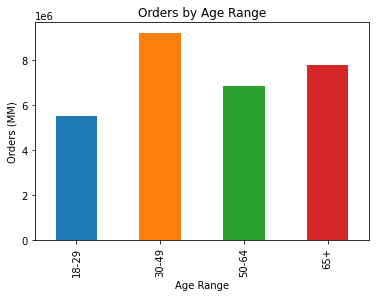

In [270]:
# Visualizing Orders by Age Range

bar_age_range = df_ords_prods_non_low_act_cust['age_range'].value_counts().sort_index().plot.bar(color = sns.color_palette())
plt.title('Orders by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Orders (MM)')


In [271]:
# Exporting the chart 

bar_age_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_range.png'))


Text(0, 0.5, 'Orders (MM)')

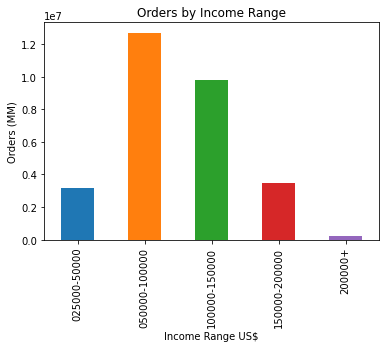

In [272]:
# Visualizing Orders by Income Range

bar_income_range = df_ords_prods_non_low_act_cust['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette())
plt.title('Orders by Income Range')
plt.xlabel('Income Range US$')
plt.ylabel('Orders (MM)')


In [274]:
# Exporting the chart 

bar_income_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_range.png'))


Text(0, 0.5, 'Orders (MM)')

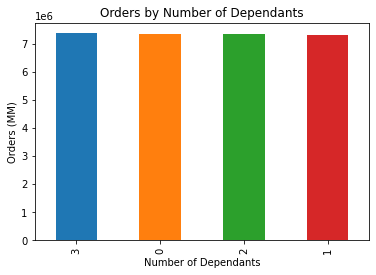

In [284]:
# Visualizing Orders by Customers who have the following Number of Dependants

bar_n_dependants = df_ords_prods_non_low_act_cust['n_dependants'].value_counts().plot.bar(color = sns.color_palette())
plt.title('Orders by Number of Dependants')
plt.xlabel('Number of Dependants')
plt.ylabel('Orders (MM)')


In [285]:
# Exporting the chart 

bar_n_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_n_dependants.png'))


Text(0, 0.5, 'Orders (MM)')

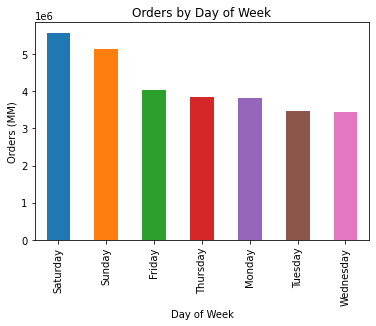

In [275]:
# Visualizing Orders by Days of the Week

bar_day_of_week = df_ords_prods_non_low_act_cust['day_of_week'].value_counts().plot.bar(color = sns.color_palette())
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders (MM)')


In [276]:
# Exporting the chart 

bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_of_week.png'))


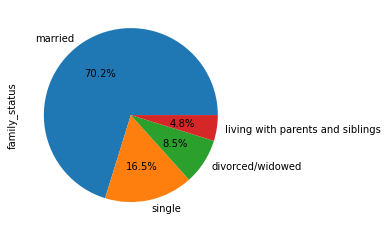

In [214]:
# Visualizing Orders by Family Status

pie_family_status = df_ords_prods_non_low_act_cust['family_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette())


In [277]:
# Exporting the chart 

pie_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_family_status.png'))


Text(0, 0.5, 'Department')

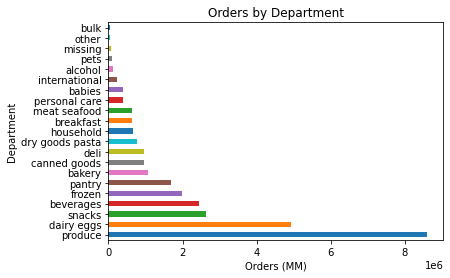

In [278]:
# Visualizing Orders by Department

bar_ords_dept = df_ords_prods_non_low_act_cust['department'].value_counts().plot.barh(color = sns.color_palette())
plt.title('Orders by Department')
plt.xlabel('Orders (MM)')
plt.ylabel('Department')


In [279]:
# Exporting the chart 

bar_ords_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_dept.png'))


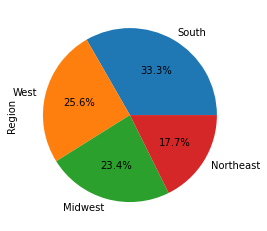

In [282]:
# Visualizing Orders by Region

pie_ords_region = df_ords_prods_non_low_act_cust['Region'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette())


In [283]:
# Exporting the chart 

pie_ords_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_ords_region.png'))


## -----------------------------------------------------------------------------------------------------------
## Aggregate the customers-profile levels

### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


### Age

In [286]:
# Frequency and expenditure by age range  

expend_age_range = df_ords_prods_non_low_act_cust.groupby('age_range').agg({'prices': ['mean', 'min', 'max']})


In [287]:
expend_age_range

prices           
               mean  min   max
age_range                     
18-29      7.788116  1.0  25.0
30-49      7.798141  1.0  25.0
50-64      7.792042  1.0  25.0
65+        7.802128  1.0  25.0

### Income

In [223]:
# Frequency and expenditure by income  

expend_income_range = df_ords_prods_non_low_act_cust.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})


In [224]:
expend_income_range

prices           
                   mean  min   max
income_range                      
025000-50000   6.712407  1.0  25.0
050000-100000  7.894964  1.0  25.0
100000-150000  7.962364  1.0  25.0
150000-200000  7.956923  1.0  25.0
200000+        7.782073  1.0  25.0

### Day of the Week

In [234]:
# Frequency and expenditure by day_of_week

expend_day_of_week = df_ords_prods_non_low_act_cust.groupby('day_of_week').agg({'prices': ['mean', 'min', 'max']})


In [235]:
expend_day_of_week

prices           
                 mean  min   max
day_of_week                     
Friday       7.863040  1.0  25.0
Monday       7.759974  1.0  25.0
Saturday     7.864295  1.0  25.0
Sunday       7.762291  1.0  25.0
Thursday     7.765798  1.0  25.0
Tuesday      7.764162  1.0  25.0
Wednesday    7.761705  1.0  25.0

### Family Status

In [219]:
# Frequency and expenditure by family_status  

expend_family_status = df_ords_prods_non_low_act_cust.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})


In [220]:
expend_family_status

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.807974  1.0  25.0
living with parents and siblings  7.806653  1.0  25.0
married                           7.795186  1.0  25.0
single                            7.789488  1.0  25.0

### Department

In [288]:
# Frequency and expenditure by department

expend_department = df_ords_prods_non_low_act_cust.groupby('department').agg({'prices': ['mean', 'min', 'max']})


In [289]:
expend_department

prices           
                      mean  min   max
department                           
alcohol           8.154750  1.0  15.0
babies            7.630969  1.0  15.0
bakery            7.870313  1.0  15.0
beverages         7.686251  1.0  15.0
breakfast         8.067599  1.0  14.9
bulk              8.345778  1.4  14.1
canned goods      7.549342  1.0  15.0
dairy eggs        8.354361  1.0  15.0
deli              7.787997  1.0  15.0
dry goods pasta   7.345952  1.0  15.0
frozen            7.738708  1.0  15.0
household         7.375989  1.0  15.0
international     7.677667  1.0  15.0
meat seafood     16.301529  8.0  25.0
missing           8.658709  1.0  15.0
other             6.954694  1.1  15.0
pantry            8.016246  1.0  20.0
personal care     8.003253  1.0  15.0
pets              7.885548  1.0  15.0
produce           7.980883  1.0  15.0
snacks            4.275461  1.6   7.0

### Region

In [291]:
# Frequency and expenditure by region

expend_region = df_ords_prods_non_low_act_cust.groupby('Region').agg({'prices': ['mean', 'min', 'max']})


In [292]:
expend_region

prices           
               mean  min   max
Region                        
Midwest    7.796798  1.0  25.0
Northeast  7.786969  1.0  25.0
South      7.800122  1.0  25.0
West       7.795709  1.0  25.0

## -----------------------------------------------------------------------------------------------------------
## Compare customer profiles

### 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [236]:
# Identifying the customer profilling crossing "department" and  "region"

crosstab_department_region = pd.crosstab(df_ords_prods_non_low_act_cust['department'], df_ords_prods_non_low_act_cust['Region'], dropna = False)



In [237]:
crosstab_department_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,31774,23253,45594,34289
babies,91346,69509,132985,97867
bakery,248209,189518,352990,273865
beverages,567084,439108,814379,617043
breakfast,148832,112799,212790,165837
bulk,7586,5370,10662,8380
canned goods,223777,166884,318438,245350
dairy eggs,1152016,870292,1638420,1262473
deli,221302,168462,314796,242993


In [238]:
# Identifying the customer profilling crossing "department" and  "region"

crosstab_department_loyalty_flag = pd.crosstab(df_ords_prods_non_low_act_cust['department'], df_ords_prods_non_low_act_cust['loyalty_flag'], dropna = False)


In [239]:
crosstab_department_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38084,23868,72958
babies,164126,40490,187091
bakery,374713,147974,541895
beverages,840154,341844,1255616
breakfast,219571,91954,328733
bulk,13595,3598,14805
canned goods,289296,154458,510695
dairy eggs,1802165,646016,2475020
deli,317771,135362,494420


In [318]:
# Identifying the customer profilling crossing "region" and  "loyalty_flag"

crosstab_region_loyalty_flag = pd.crosstab(df_ords_prods_non_low_act_cust['Region'], df_ords_prods_non_low_act_cust['loyalty_flag'], dropna = False)


In [335]:
crosstab_region_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2332082,976838,3565330
Northeast,1809855,723685,2644389
South,3345908,1370166,5049578
West,2617000,1059036,3835911


## -----------------------------------------------------------------------------------------------------------
## Illustrate the analysis for customer profiles

### 9 Produce suitable charts to illustrate your results and export them in your project folder.


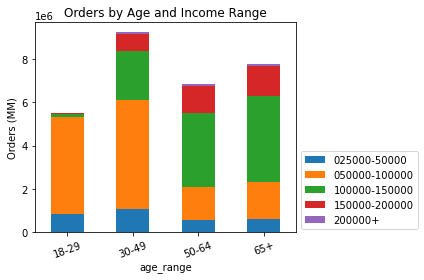

In [304]:
# Visualizing orders by age and income range

bar_crosstab_income = crosstab_income.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Age and Income Range')
plt.ylabel('Orders (MM)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()


In [305]:
# Exporting the chart 

bar_crosstab_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_income.png'))


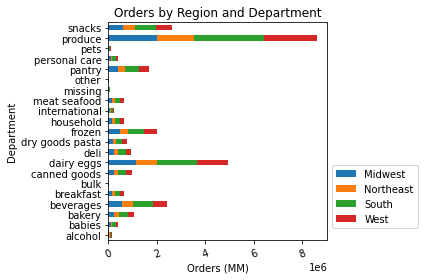

In [308]:
# Visualizing orders by departments and regions

bar_crosstab_department_region = crosstab_department_region.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Department')
plt.ylabel('Department')
plt.xlabel('Orders (MM)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()


In [309]:
# Exporting the chart 

bar_crosstab_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_department_region.png'))


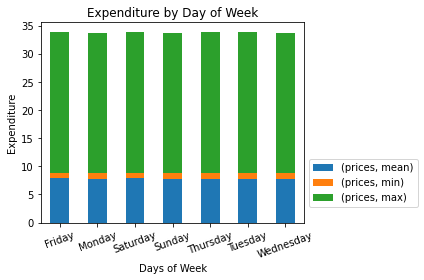

In [313]:
# Visualizing expenditure by days of the week

bar_expend_day_of_week = expend_day_of_week.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Expenditure by Day of Week')
plt.ylabel('Expenditure')
plt.xlabel('Days of Week')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()


In [315]:
# Exporting the chart 

bar_expend_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_expend_day_of_week.png'))


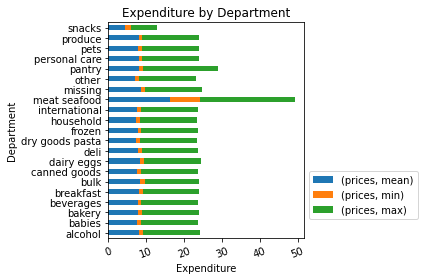

In [314]:
# Visualizing expenditure by department

bar_expend_department = expend_department.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Expenditure by Department')
plt.ylabel('Department')
plt.xlabel('Expenditure')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()


In [316]:
# Exporting the chart 

bar_expend_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_expend_department.png'))


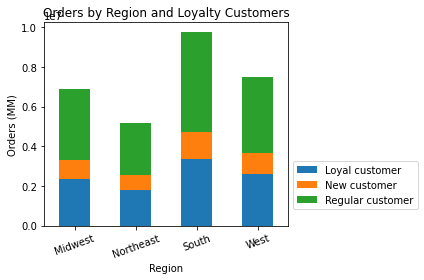

In [320]:
# Visualizing orders by region and loyalty customers

bar_crosstab_region_loyalty = crosstab_region_loyalty_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Loyalty Customers')
plt.ylabel('Orders (MM)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()


In [321]:
# Exporting the chart 

bar_crosstab_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_region_loyalty.png'))


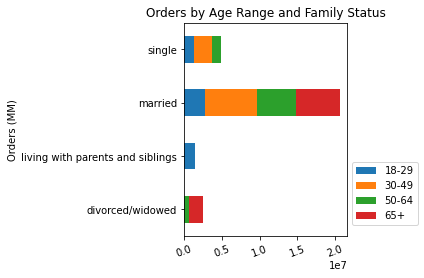

In [331]:


# Visualizing orders by age and family status

bar_crosstab_family_status_age = crosstab_family_status_age.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Age Range and Family Status')
plt.ylabel('Orders (MM)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()



## -----------------------------------------------------------------------------------------------------------
## Tidy up, export and save the work complete

### 10 Tidy up your script, export your final data set, and save your notebook.


In [317]:
# Exporting the final data set

df_ords_prods_non_low_act_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_non_low_act_cust_4.10.pkl'))


## -----------------------------------------------------------------------------------------------------------
# Final Report - part 2

In [264]:
# The final report can be accessed via the link below in the Google Sheets format.
# Link - https://docs.google.com/spreadsheets/d/1AMhyohyzGPlamP4a_kJV-xj25mjJlbOTSlgw3YQGvHY/edit?usp=sharing
